Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Jingren Wang"
COLLABORATORS = "N.A."

---

# CS110 Pre-class Work 4.2

## Part A. The Hire-Assistant Problem.

Imagine that you need to hire a new assistant. Every day an agency sends a new assistant for you to interview. If the assistant is better than your current assistant, then you fire your current assistant and you hire the better assistant. You may assume that assistant quality is uniformly distributed between 0 and 1.

## Question 1.
Write a function, named hire_assistant, that takes applicants (a list of the numbers that represent the level of qualification of the applicants; the higher the number, the better qualified), and returns the number hires if the applicants are presented in the exact same order as the input list applicants. Note that your function should not randomize anything (or else it would be called a randomized algorithm).

In [2]:
def hire_assistant(applicants):
    """
    Return the number of assistant hired.
    Inputs:
    - applicants: a list of the numbers that represent the level of qualification of 
    the applicants; the higher the number, the better qualified
    
    Outputs:
    - hires: Number of assistants hired
    """
    best = -float('inf')  #initiate a least-qualified dummy candidate
    n = len(applicants)
    hires = 0 # initiate a counter for number of candidates hired
    for i in range(n):
        if applicants[i] > best:
            best = i
            hires += 1
            
    return hires
          

In [3]:
assert(hire_assistant([1])==1)
assert(hire_assistant([-1, -2, -3, -4])==1)

## Question 2. 
Assuming the applicants are presented in a random order, write a function that receives the number of applicants as input and returns the average number of assistants hired.

**N.B.:** Don’t forget to run the simulation several times for each given number of applicants to better estimate the number of hires (please refer to task 3 of the Study Guide).

In [4]:
import random

def single_simulation(N):
    best = -1
    hires = 0 # initiate hiring counter
    num_sims  = 1000  #number of simulations
     
    for n in range(N):
        new_cand = random.random()  #randomly generate a new candidate quality
        if new_cand > best:
            best = new_cand
            hires += 1
            
    return hires


def experimental_hires(N, num_sims):  
    """
    takes two args: 
        N = length of candidate array
        num_sims = number of random simulations to compute average hires  
    """
    sum_hires = 0 
    for i in range(num_sims):
        sum_hires += single_simulation(N)

    return sum_hires/num_sims



In [5]:
# test case:

N = 1000
num_sims = 1000

single_simulation(N)
experimental_hires(N, num_sims)


7.496

## Question 3.

Use the function below, `analytical_hires(N)`, which returns the analytical expected number of hires, given the number of applicants, along with the function you created in question 2 to create a graph with two curves such that:
* The x-axis shows the total number of applicants (make sure label the x-axis)
* The y-axis shows the average number of hires (make sure label the y-axis)
* The graph contains two curves;
    * Curve 1: the theoretical performance estimates computed calls to the function `analytical_hires`.
    * Curve 2: the simulated or experimental estimates using the function you created in question 2.


In [6]:
def analytical_hires(N):
    """
    Return the analytical expected number of hires if there are N applicants
    Inputs:
    - N: Number of applicants
    Outputs:
    - hires: Average number of assistants hired
    """
    # from the textbook, we know that the analytical result is 
    # 1 + 1/2 + 1/3 + ... + 1/N
    hires = 0
    for n in range(N):
        hires += 1/(n+1)
    return hires

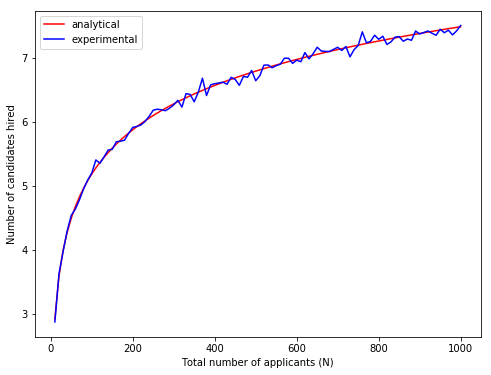

In [7]:
# create two lists of hires from experimental and analytical approaches
import numpy as np
from matplotlib import pyplot as plt

Ns = list(range(10,1010, 10))  #generate a list of Ns: 10, 20, ... 1000

y_anlyt = []
y_expmt = []
num_sims = 1000

for N in Ns:
    y_anlyt.append(analytical_hires(N))
    y_expmt.append(experimental_hires(N, num_sims))
    
plt.figure(figsize=(8,6) )   
plt.plot(Ns, y_anlyt, 'r-', label = 'analytical')
plt.plot(Ns, y_expmt, 'b-', label = 'experimental')
plt.xlabel('Total number of applicants (N)')
plt.ylabel('Number of candidates hired')
plt.legend()
plt.show()

## Question 4.

Plot a graph with the x-axis showing the total number of applicants and the y-axis showing the probability that exactly one assistant is hired.

In [8]:
# take an experimental approach
def pr_hire_one(N, num_sims):
    count = 0
    for n in range(num_sims): 
        if single_simulation(N) == 1:
            count += 1
    pr_hire_1 = count/num_sims
    
    return pr_hire_1


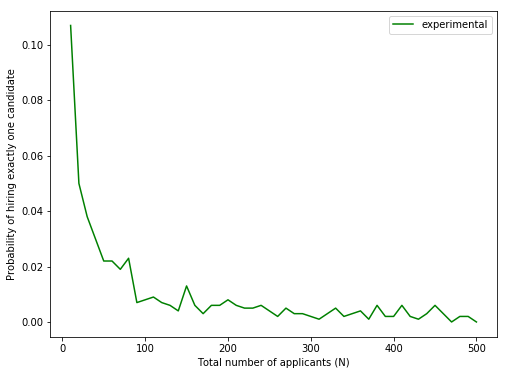

In [9]:
Ns = list(range(10,510, 10))  #generate a list of Ns: 10, 20, ... 1000

pr_1 = []
num_sims = 1000

for N in Ns:
    pr_1.append(pr_hire_one(N, num_sims))

plt.figure(figsize=(8,6) )   
plt.plot(Ns, pr_1, 'g-', label = 'experimental')

plt.xlabel('Total number of applicants (N)')
plt.ylabel('Probability of hiring exactly one candidate')
plt.legend()
plt.show()

## [Optional] Question 5.
Assume that an assistant is able to perform an amount of work each day that is equal to their “quality”. You have a total amount of work M that needs to be accomplished. Your costs are as follows:
* X = daily salary for the assistant,
* Y = fee to the employment agency,
* Z = retrenchment fee for the old assistant.

Try to formulate an optimal stopping rule (ie. at what point should one stop requesting new potential hires from the agency?) Make any necessary assumptions to ensure the problem is well-formulated.


## Part B. The Hat Check Problem.

There is a coat check at a party, where an attendant stores everyone’s hat while they attend the party. The attendant receives the N hats from everyone attending (all attendees come with a hat). Unfortunately, the coat check attendant forgets which hat belongs to whom. Rather than admitting a mistake, the attendant simply returns random hats back to the party goers. 
What is the average number of correct hats returned? Here are some guiding questions to help you to simulate this problem. 

## Question 1. 
Knowing that everyone’s hats are unique and every guest has a hat. Do you need to generate a random sample in a similar way as what you did for the hiring assistant problem? 

yes, an event of one guest getting his hat correctly can be modelled by an indicator random variable <br>
for i = 1,2,...,N, N = total number of guests <br>

X_i = I {attendant returns a hat to guest i} <br>

    X_i = 1 if attendant returns the right hat to guest i;<br>
    X_i = 0 if attendant does not returns the right hat to guest i;
    
such that, for an ordered input array of N, we reshuffle the order randomly and count the number of matches for each index (a guest receives the right hat)

## Question 2. 
Which of the following commands do you think is the Pythonic way to implement that? 
```
import numpy as np
n = 100 #the number of party attendants `
```
**Command 1. **
```
hat_list = [np.random.integers(0,n) for i in range(n)]`
```
**Command 2.**
```
hat_list = list(range(n)) 
np.random.shuffle(hat_list) 
```
**Command 3.**
```
hat_list = np.random.sample(n)
```

Command 2 <br>
This command generate an ordered list of integers denoting the initial order of hat storage, i.e. the 1st guest should receive the 1st hat, the 2nd guest should receive the 2nd hat, etc. <br>
next, shuffle the hat_list randomly to simulate the order of hat release by the attendant.


## Question 3.
Now write a function `hat_check(N)` that has: 
* Input: N the number of party attendants. 
* Output: the number of hats correctly returned despite the fact that hats are randomly handed back to the guests.

You should use the command you picked for question 2. 

In [10]:
def hat_check(N):
    # generate an ordered hat list upon entrance
    hat_list = list(range(N))
    # random shuffle of the ordered list to simulate hat release by the attendant
    np.random.shuffle(hat_list)
    # initiate a match counter
    matches = 0
    # count number of matches
    for i in range(N):
       #print('correct_i = ', i)
       # print('hat_list[i] = ', hat_list[i])
        if hat_list[i] == i:
            matches += 1
            
    return matches

In [11]:
# test case
N1 = 3
print(hat_check(N1), 'out of', N1,'attendants received their hats correctly.')

N2 = 10
print(hat_check(N2), 'out of', N2,'attendants received their hats correctly.')

N3 = 100
print(hat_check(N3), 'out of', N3,'attendants received their hats correctly.')



1 out of 3 attendants received their hats correctly.
2 out of 10 attendants received their hats correctly.
0 out of 100 attendants received their hats correctly.


## Question 4.

Plot a curve with the x-axis showing the total number of party attendants and the y-axis showing the average number of hats correctly returned. As always, remember to run several trials. 

In [12]:
def sim_hat_check_mean(N, num_sims): 
    sum_checks = 0
    for i in range(num_sims):
        sum_checks += hat_check(N)
        
    return sum_checks/num_sims

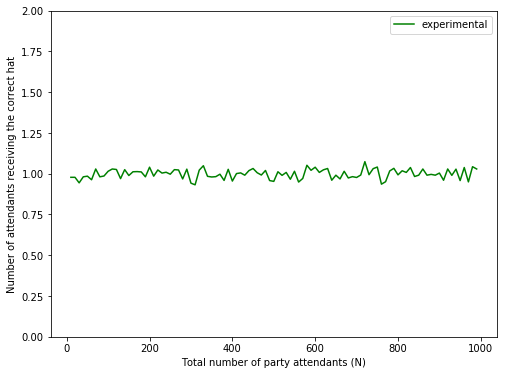

In [13]:
Ns = list(range(10,1000,10))  #generate a list of Ns: 10, 20, ... 1000

hat_checks = []
num_sims = 1000

for N in Ns:
    hat_checks.append(sim_hat_check_mean(N, num_sims))
    
plt.figure(figsize=(8,6))
plt.plot(Ns, hat_checks, 'g-', label = 'experimental')
plt.xlabel('Total number of party attendants (N)')
plt.ylabel('Number of attendants receiving the correct hat')
plt.ylim(0,2)
plt.legend()
plt.show()

## [Optional] Question 5.
As $N$ tends to infinity, the number of correct hats returned tends towards a well-known statistical distribution. State the distribution with all its parameters. Plot several samples using your code. Does the empirical distribution match your theoretical prediction?

Out of the total number of permutations of hat distribution, N!, every attendant has (N-1!) permutations to get his/her hat correctly, which means that the marginal probability for one attendant to receive the correct hat is (N-1!)/N! = 1/N. Therefore, the expected number of attendants receiving the right hand would be the sum of each indicator random variable (ivr = 1) with its associated probability 1/N
E(x)= N*1/N = 1, so we expect to see one person receiving the right hat.

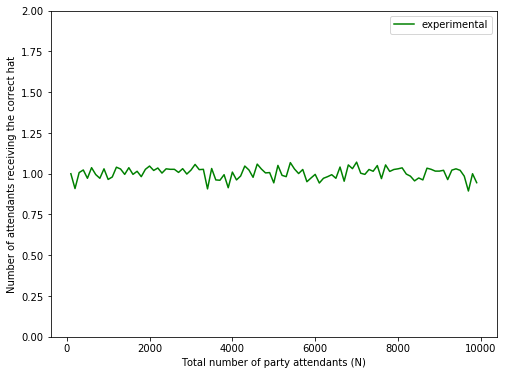

In [16]:
Ns = list(range(100,10000,100))  #generate a list of Ns: 10, 20, ... 1000

hat_checks = []
num_sims = 1000

for N in Ns:
    hat_checks.append(sim_hat_check_mean(N, num_sims))
    
plt.figure(figsize=(8,6))
plt.plot(Ns, hat_checks, 'g-', label = 'experimental')
plt.xlabel('Total number of party attendants (N)')
plt.ylabel('Number of attendants receiving the correct hat')
plt.ylim(0,2)
plt.legend()
plt.show()